# TCS Internship - Forecasting Model

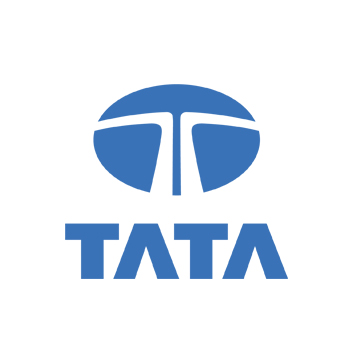

### Data Collection

---
The data is been collected from Kaggle and then it is uploaded to the github repository for importing in python

The Dataset consists of Data on TATA Global Stocks from the year 2010 to 2018.

Kaggle Dataset - https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv

In [1]:
#Importing dependencies
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing datasets
df = pd.read_csv("https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv")

In [3]:
df.head() #top 5 entries from the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [4]:
df.tail() #last 5 entries from the dataset

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
2030,2010-07-27,117.6,119.50,112.00,118.80,118.65,586100,694.98
2031,2010-07-26,120.1,121.00,117.10,117.10,117.60,658440,780.01
2032,2010-07-23,121.8,121.95,120.25,120.35,120.65,281312,340.31
2033,2010-07-22,120.3,122.00,120.25,120.75,120.90,293312,355.17
2034,2010-07-21,122.1,123.00,121.05,121.10,121.55,658666,803.56


In [5]:
#Shape of dataset
df.shape

(2035, 8)

### Data Processing
---
In this step data is been further processed and cleaned for EDA and modeling


In [6]:
#Statistical description of the data
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
#finding realtion between the variables
df.corr() 

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
Open,1.000000,0.999015,0.998825,0.997781,0.997840,0.385951,0.612877
High,0.999015,1.000000,0.998773,0.999155,0.999194,0.406405,0.630589
Low,0.998825,0.998773,1.000000,0.999051,0.999119,0.380621,0.608502
Last,0.997781,0.999155,0.999051,1.000000,0.999961,0.399328,0.624584
Close,0.997840,0.999194,0.999119,0.999961,1.000000,0.398911,0.624213
Total Trade Quantity,0.385951,0.406405,0.380621,0.399328,0.398911,1.000000,0.926931
Turnover (Lacs),0.612877,0.630589,0.608502,0.624584,0.624213,0.926931,1.000000


In [8]:
#info of datatypes, rows, columns, etc
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


Data Cleaning

In [9]:
#Checking the null values
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

There are no null values in the given dataset

In [10]:
#Converting datatype of date into datetime from object
df['Date'] = pd.to_datetime(df['Date'])

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   Date                  2035 non-null   datetime64[ns]
 1   Open                  2035 non-null   float64       
 2   High                  2035 non-null   float64       
 3   Low                   2035 non-null   float64       
 4   Last                  2035 non-null   float64       
 5   Close                 2035 non-null   float64       
 6   Total Trade Quantity  2035 non-null   int64         
 7   Turnover (Lacs)       2035 non-null   float64       
dtypes: datetime64[ns](1), float64(6), int64(1)
memory usage: 127.3 KB


In [12]:
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [13]:
#Checking the starting and ending date of the dataset
print(df['Date'].min())
print(df['Date'].max())

2010-07-21 00:00:00
2018-09-28 00:00:00


In [14]:
#Creating month and year column
df['Month'] = df['Date'].apply(lambda x: x.strftime ('%y-%m'))
df['Year'] = df['Date'].apply(lambda x: x.strftime ('%y'))
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs),Month,Year
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35,18-09,18
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95,18-09,18
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60,18-09,18
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90,18-09,18
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55,18-09,18


### Data Visualization

In [15]:
import plotly.graph_objects as go

#making candlestick graph for tesla dataset
go.Figure(data=[go.Candlestick(x=df['Date'],
                open=df['Open'],
                high=df['High'],
                low=df['Low'],
                close=df['Close'])])

This is a candlestick diagram in which we can understand that the tata stock drastically increased in the year 2017-18.

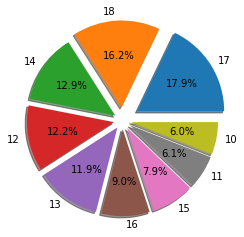

In [16]:
#Piechart for Volume of shares through the years
pc = df[['Year', 'Total Trade Quantity']]
vol = pc.groupby('Year')['Total Trade Quantity'].mean().sort_values(ascending = False).reset_index()

plt.pie(vol['Total Trade Quantity'], labels=vol['Year'],
        explode = (0.2,0.15,0.1,0.1,0.1,0.1,0.1,0.1,0.1),
        autopct = '%1.1f%%',
        shadow=True)
plt.show()

We can clearly see that te maximum volume of Tata stocks is been traded in the year 2017

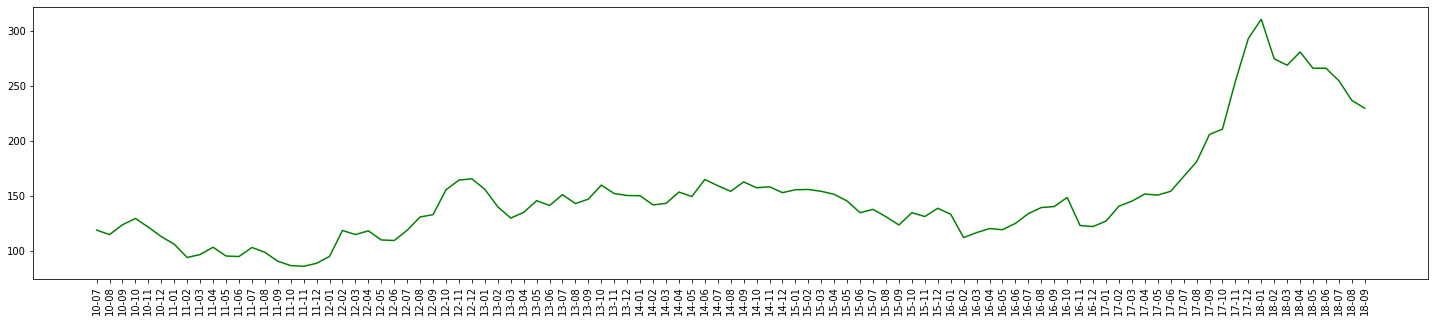

In [17]:
#Share prices on monthly basis
a = df.groupby('Month')['Close'].mean()
plt.figure(figsize=(25,5))
plt.plot(a, color = 'green')
plt.xticks(rotation = 'vertical')
plt.show()

Here we can see that the maximum price of the Tesla stock was reached in year 2017 in the month of December.

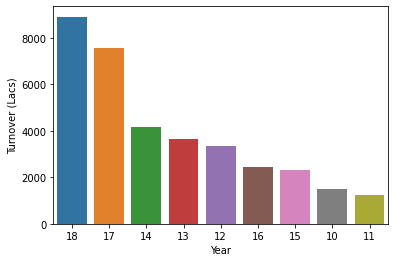

In [18]:
trd = df[['Year','Turnover (Lacs)']]
a = trd.groupby('Year')['Turnover (Lacs)'].mean().sort_values(ascending = False).reset_index()

sns.barplot(a['Year'], a['Turnover (Lacs)'])
plt.show()

We can see that the year 2018 was the year with highest turnover followed by 2017 and 2014. Year 2011 was the year where the turnover was the least.

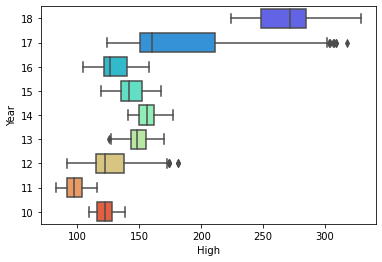

In [19]:
sns.boxplot(df['High'], df['Year'], palette = 'rainbow')

The boxplot tells us that in the year 2018 tata stock reached to its highest value

### More Feature Engineering and EDA

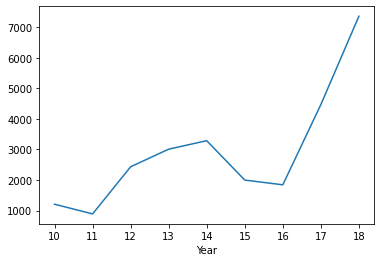

In [20]:
df.groupby('Year')['Turnover (Lacs)'].median().plot()

Though the annual turnover from 2016 is growing it is not showing any linear relationship with years

In [21]:
numerical_features = [feature for feature in df.columns if df[feature].dtype != 'O']

print('Number of numerical variables: ', len(numerical_features))
df[numerical_features].head()

Number of numerical variables:  8


,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [22]:
continous_feature = [feature for feature in numerical_features if feature not in ['Turnover (Lacs)']]
print(len(continous_feature))

7


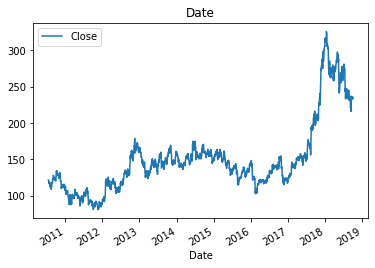

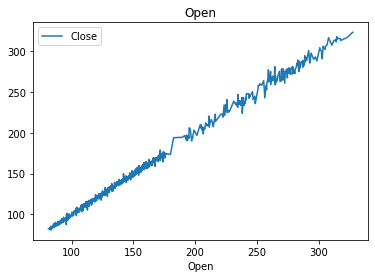

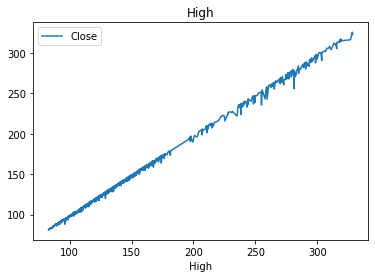

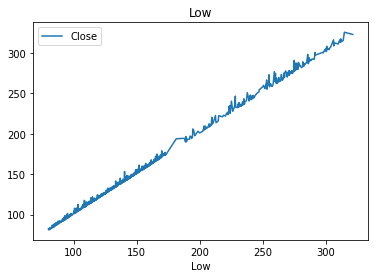

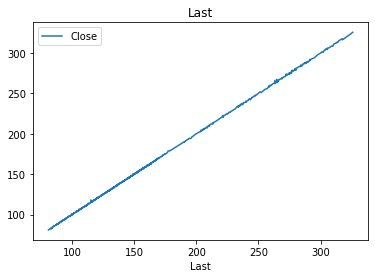

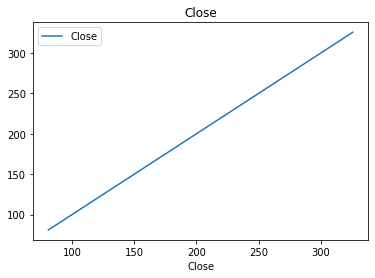

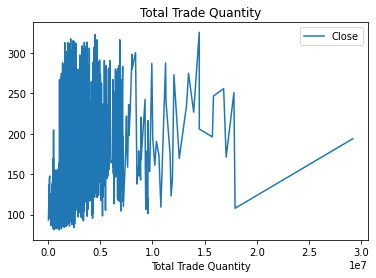

In [85]:
for feature in continous_feature:
    data=df.copy()
    df.groupby(feature)[['Close']].median().plot()
    plt.title(feature)
    plt.show()

We can see here that the close parameter is showing linear relationship with the other parameters except total trade quantity.

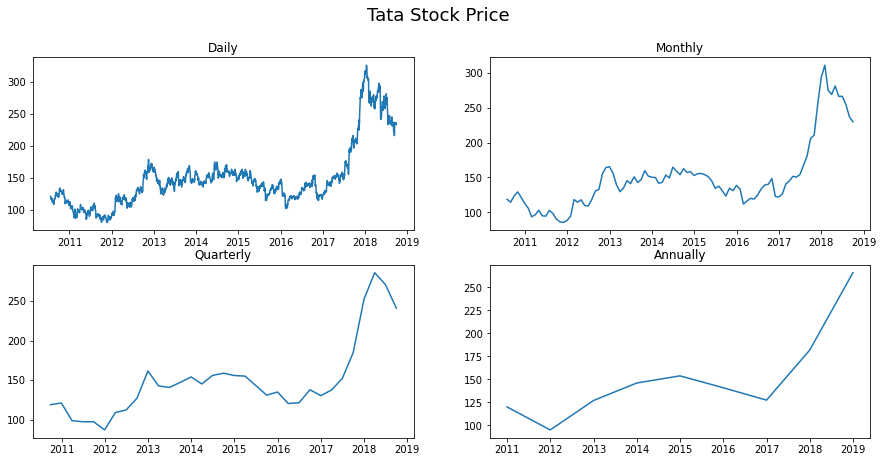

In [81]:
#Plotting the stocks yearly, quaterly, monthly, and daily basis

fig,axes = plt.subplots(2,2,figsize=[15,7])
fig.suptitle('Tata Stock Price',size=18)

#Daily Stock
axes[0,0].plot(df.Close)
axes[0,0].set_title("Daily")

#Monthly Stock
axes[0,1].plot(df.Close.resample('M').mean())
axes[0,1].set_title("Monthly")

#Quaterly Stocks 
axes[1,0].plot(df.Close.resample('Q').mean())
axes[1,0].set_title('Quarterly')

#Annual Stocks
axes[1,1].plot(df.Close.resample('A').mean())
axes[1,1].set_title('Annually')

plt.show()

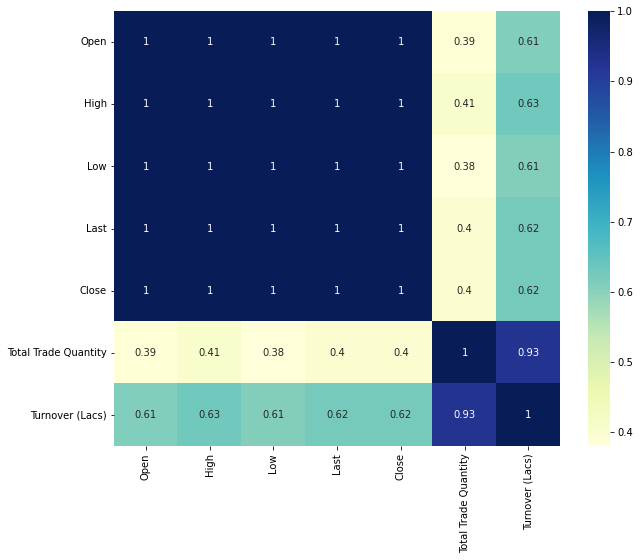

In [24]:
plt.figure(figsize = (10,8))
sns.heatmap(df.corr(), annot = True, cmap = 'YlGnBu')
plt.show()

### Decomposing

In [25]:
#Setting Date column as index
df.set_index('Date', inplace = True)

In [26]:
data = df.Close.resample('Q').mean()

In [27]:
data.describe()

count     33.000000
mean     149.412397
std       48.162156
min       86.986667
25%      121.067188
50%      140.762698
75%      155.881897
max      285.990833
Name: Close, dtype: float64

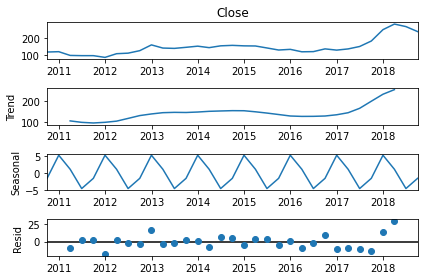

In [28]:
#importing the dependencies for decomposting
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data,model='additive')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
decomposition.plot();

In additive model we can see that the height of the graph of seasonal variation is constant. The seasonal graph is neither increasing nor decreasing in its height and width.

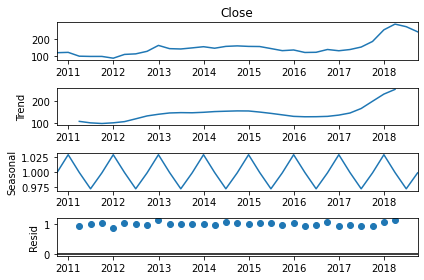

In [83]:
from statsmodels.tsa.seasonal import seasonal_decompose
decomposition=seasonal_decompose(data,model='multiplicative')
trend=decomposition.trend
seasonal=decomposition.seasonal
residual=decomposition.resid
decomposition.plot();

In Multiplicative Model, again we can see some reoccuring pattern in seasonal variation but seasonal variation is moving in one-direction, its neither moving upwards nor it is moving downward. So here we have to select the **additive model.**

### Stationary

In [30]:
def plot_rolling_stats(series,window=1):
    ## calculating the rolling mean and rolling standard deviation
    rol_mean = series.rolling(window).mean()
    rol_std  = series.rolling(window).std()
    
    ## ploting the results along side the original data
    fig = plt.figure(figsize=(10,5))
    orig = plt.plot(series,color='blue',label='Original')
    mean = plt.plot(rol_mean,color='red',label='Rolling mean')
    std  = plt.plot(rol_std,color='black',label='Rolling std')
    
    plt.title('Rolling Mean/Standard Deviation',size=20)
    plt.legend(loc='best')
    plt.show(block=False)

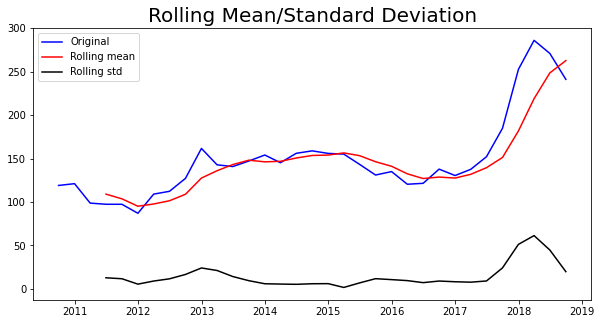

In [31]:
plot_rolling_stats(data,4)

Here in this graph we can see that the rolling standard deviation is not inline with rolling mean and original data. We have to go ahead and perform ADF test (Augmented Dickey-Fuller test to check whether the data is really stationary or not.

### Augmented Dickey - Fuller Test

In [32]:
#Importing the dependencies for ADF test
from statsmodels.tsa.stattools import adfuller

In [33]:
#Making a function to check p-values, lags, critical values
def stationarity_check(series):
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(series, autolag='AIC') 

    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value',
                                             '#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
        
    print(dfoutput)

In [34]:
stationarity_check(data)

Results of Dickey Fuller Test:
Test Statistic                 -1.710470
p-value                         0.425726
#Lags Used                      1.000000
Number of Observations Used    31.000000
Critical Value (1%)            -3.661429
Critical Value (5%)            -2.960525
Critical Value (10%)           -2.619319
dtype: float64


The data is not stationary as the p-value is 0.425726 which is greater than 0.05 and hence we can't reject the null hypothesis.

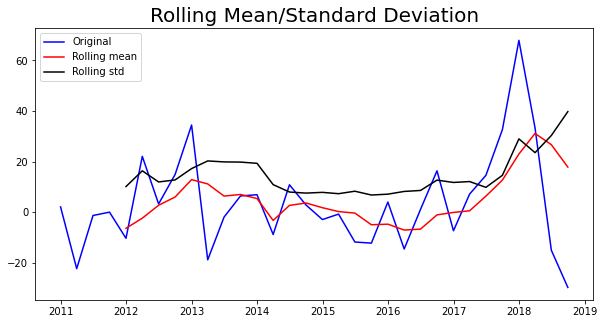

Results of Dickey Fuller Test:
Test Statistic                 -3.455384
p-value                         0.009210
#Lags Used                      1.000000
Number of Observations Used    30.000000
Critical Value (1%)            -3.669920
Critical Value (5%)            -2.964071
Critical Value (10%)           -2.621171
dtype: float64


In [35]:
#Rolling mean and Standard deviation wrt to original data
plot_rolling_stats(data.diff()[1:],5)
stationarity_check(data.diff()[1:])

### Autocorrelation Function (ACF) and Partial Autocorrealtion Function (PACF)

In [36]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

In [37]:
from statsmodels.tsa.stattools import acf,pacf

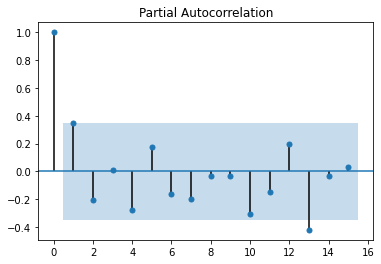

<Figure size 1008x360 with 0 Axes>

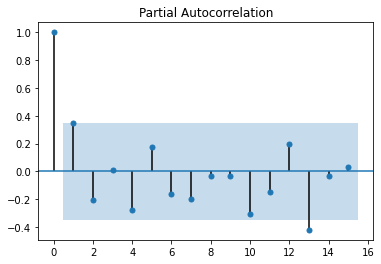

In [38]:
#Plotting PACF Autocorrelation
fig = plt.figure(figsize=(14,5))
plot_pacf(data.diff().dropna(), lags=15)

PACF is the partial autocorrelation function that explains the partial correlation between the series and lags itself. Here we can see that PACF with lag of 15 gives us value as 1 for p.

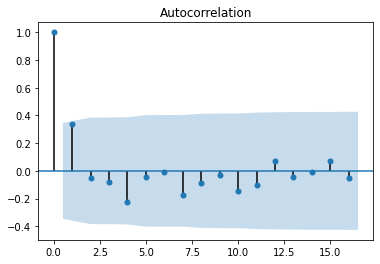

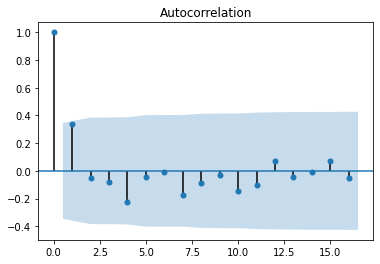

In [39]:
#Plotting ACF Autocorrelation
plot_acf(data.diff().dropna())

As we can see here the ACF model also gives us the value of 1 for d.

### ARIMA Model

In [40]:
#importing the ARIMA Model
from statsmodels.tsa.arima_model import ARIMA

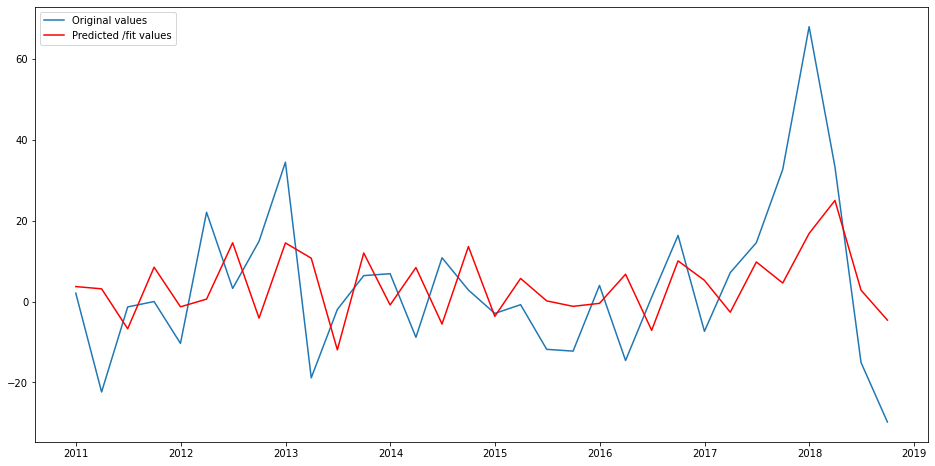

In [41]:
#Plotting the ARIMA Model for Original values and Predicted Values
plt.figure(figsize=(16,8))
model=ARIMA(data,order=(1,1,1)) # order = (p,d,q)
results_ARIMA=model.fit(disp=-1)
plt.plot(data.diff(),label= 'Original values')
plt.plot(results_ARIMA.fittedvalues,color='red',label='Predicted values')
plt.legend(loc='best')

In [42]:
results_ARIMA.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             ARIMA Model Results                              
==============================================================================
Dep. Variable:                D.Close   No. Observations:                   32
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -136.623
Method:                       css-mle   S.D. of innovations             17.193
Date:                Mon, 14 Nov 2022   AIC                            281.246
Time:                        12:05:22   BIC                            287.109
Sample:                    12-31-2010   HQIC                           283.190
                         - 09-30-2018                                         
=================================================================================
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const             3.6884      4.187      0.881      0.378      -4.518      11.894
ar.L1.D.Close    -0.2274      0.282     -0.807      0.419      -0.779       0.325
ma.L1.D.Close     0.7024      0.199      3.527      0.000       0.312       1.093
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -4.3974           +0.0000j            4.3974            0.5000
MA.1           -1.4237           +0.0000j            1.4237            0.5000
-----------------------------------------------------------------------------
"""

### SARIMAX Model

In [43]:
#Importing the SARIMAX Model
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [44]:
size = 0.8 #train size
train, test = data.iloc[:int(size*len(data))], data.iloc[int(size*len(data)):]

In [45]:
print(train)

Date
2010-09-30    119.002941
2010-12-31    121.067188
2011-03-31     98.695968
2011-06-30     97.354839
2011-09-30     97.343651
2011-12-31     86.986667
2012-03-31    109.041406
2012-06-30    112.276190
2012-09-30    127.169841
2012-12-31    161.611475
2013-03-31    142.737903
2013-06-30    140.762698
2013-09-30    147.158730
2013-12-31    154.034677
2014-03-31    145.180159
2014-06-30    155.994167
2014-09-30    158.828571
2014-12-31    155.881897
2015-03-31    155.094355
2015-06-30    143.268033
2015-09-30    131.002344
2015-12-31    134.978689
2016-03-31    120.398361
2016-06-30    121.463710
2016-09-30    137.795161
2016-12-31    130.418548
Freq: Q-DEC, Name: Close, dtype: float64


In [46]:
print(test)

Date
2017-03-31    137.548387
2017-06-30    152.089344
2017-09-30    184.738095
2017-12-31    252.675806
2018-03-31    285.990833
2018-06-30    270.907812
2018-09-30    241.110656
Freq: Q-DEC, Name: Close, dtype: float64


In [47]:
#Summarizing SARIMAX Model
model = SARIMAX(train,order=(1,1,1),seasonal_order=(1,1,1,4)).fit(disp=-1)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                     
=========================================================================================
Dep. Variable:                             Close   No. Observations:                   26
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 4)   Log Likelihood                 -85.652
Date:                           Mon, 14 Nov 2022   AIC                            181.304
Time:                                   12:05:23   BIC                            186.527
Sample:                               09-30-2010   HQIC                           182.438
                                    - 12-31-2016                                         
Covariance Type:                             opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7607      1.028     -0.740      0.459      -2.776       1.254
ma.L1          0.9997    678.346      0.001      0.999   -1328.534    1330.534
ar.S.L4       -0.3233      0.389     -0.832      0.405      -1.085       0.438
ma.S.L4       -0.9988    261.766     -0.004      0.997    -514.050     512.053
sigma2       112.8930   7.57e+04      0.001      0.999   -1.48e+05    1.48e+05
===================================================================================
Ljung-Box (L1) (Q):                   0.25   Jarque-Bera (JB):                 3.19
Prob(Q):                              0.62   Prob(JB):                         0.20
Heteroskedasticity (H):               0.43   Skew:                             0.94
Prob(H) (two-sided):                  0.29   Kurtosis:                         3.31
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

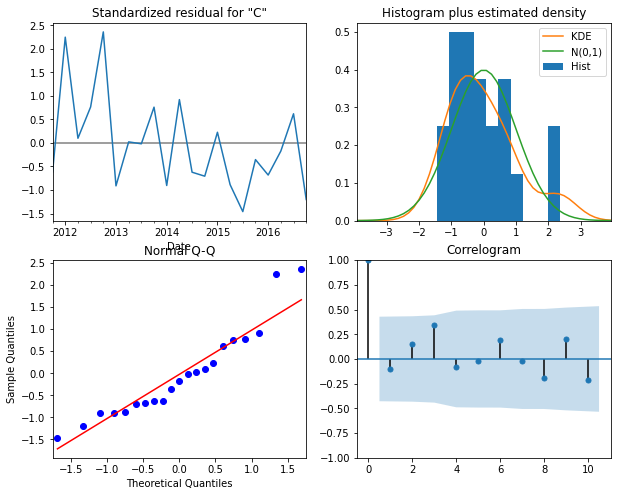

In [48]:
model.plot_diagnostics(figsize=(10,8))
plt.show()

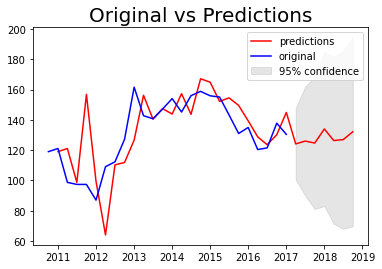

In [49]:
predictions = model.get_prediction(start='2010-09-30',end='2018-09-30')
conf = predictions.conf_int()
test_conf = conf.loc[test.index[0]:]

#ploting results
plt.plot(predictions.predicted_mean[1:],color='red',label='predictions')
plt.plot(train,color='blue',label='original')
plt.fill_between(test_conf.index, test_conf.iloc[:,0], test_conf.iloc[:,1], color='gray', alpha=.2,label='95% confidence')
plt.title('Original vs Predictions',size=20)
plt.legend(loc='best');

In [50]:
#Checking the mean absolute error and mean absolute percentage error
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error
print(f"Mean Absolute Error: {mean_absolute_error(data[1:],predictions.predicted_mean[1:])}")
print(f"Mean Absolute Percentage Error: {mean_absolute_percentage_error(data[1:],predictions.predicted_mean[1:])}")

Mean Absolute Error: 30.05567571177318
Mean Absolute Percentage Error: 0.16713165641149363


### Multi-Linear Regression

In [51]:
#Importing the dependancies for train, test, split
from sklearn.model_selection import train_test_split

In [52]:
#Chossing the independent variable
x = df.drop(['Year','Month','Close'], axis=1)

In [53]:
x.head()

,Open,High,Low,Last,Total Trade Quantity,Turnover (Lacs)
Date,,,,,,
2018-09-28,234.05,235.95,230.20,233.50,3069914,7162.35
2018-09-27,234.55,236.80,231.10,233.80,5082859,11859.95
2018-09-26,240.00,240.00,232.50,235.00,2240909,5248.60
2018-09-25,233.30,236.75,232.00,236.25,2349368,5503.90
2018-09-24,233.55,239.20,230.75,234.00,3423509,7999.55


In [54]:
#choosing dependent variable
y = df['Close']

In [55]:
y.head()

Date
2018-09-28    233.75
2018-09-27    233.25
2018-09-26    234.25
2018-09-25    236.10
2018-09-24    233.30
Name: Close, dtype: float64

In [56]:
#splitting the data
X_train, X_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size=0.3,
                                                    random_state=0)

In [57]:
from sklearn.linear_model import LinearRegression

In [58]:
mlr = LinearRegression()

In [59]:
mlr.fit(X_train, y_train) #fitting the data

LinearRegression()

In [60]:
pred = mlr.predict(X_test)

In [61]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1424, 6), (611, 6), (1424,), (611,))

In [62]:
#Reshaping the values
y_train = y_train.values.reshape(-1,1)
y_test = y_test.values.reshape(-1,1)

In [63]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1424, 6), (611, 6), (1424, 1), (611, 1))

In [64]:
pred #predicitng the values

array([135.90918442, 145.84076229, 157.27983247, 152.02769836,
       112.11688954, 157.56193245, 144.53484853, 163.66080279,
       109.39588313, 140.93736674, 140.88466933, 130.71587814,
       152.85458876, 144.98452448, 148.79970825, 278.44457964,
       131.91079198, 155.73433073, 146.96845912,  97.0058791 ,
       142.46853796, 144.87531055,  88.16405734, 167.73255137,
       125.13411741, 115.45009072, 160.06378623, 120.65247738,
       209.84057427,  99.42787432, 140.77788356, 142.63753739,
       234.86792326, 140.03417552, 142.22394303, 157.00279753,
       127.01384494, 137.01894416, 141.02881976, 144.19451054,
       147.40809541, 156.67859768, 211.61669757, 104.44792707,
       124.7941617 , 311.21249824, 279.09143733, 121.05593854,
       198.5449923 , 234.76296094, 127.67619989, 117.11695948,
       127.23856353,  94.27965454, 107.91364337, 142.05482286,
       237.30634721, 275.48450012, 124.16645706, 123.88918093,
       137.93923233, 154.7108238 , 110.02269825, 206.79

In [65]:
mlr.score(X_test, y_test) #prediction

0.9999321221990332

### Decision Tree

In [66]:
from sklearn.tree import DecisionTreeRegressor
reg = DecisionTreeRegressor()
reg.fit(X_train, y_train) #fitting the data

DecisionTreeRegressor()

In [67]:
y_train_pred = reg.predict(X_train)
y_train_pred #predicting further values

array([155.4 , 148.7 , 148.8 , ...,  97.1 , 127.85, 144.8 ])

In [68]:
y_pred=reg.predict(X_test)

In [69]:
y_pred #predicting the values

array([135.9 , 145.75, 157.4 , 152.15, 112.05, 157.75, 144.7 , 163.85,
       109.6 , 141.65, 140.55, 130.45, 152.6 , 144.55, 148.  , 278.2 ,
       132.35, 156.2 , 146.7 ,  96.35, 142.55, 145.1 ,  88.25, 167.5 ,
       125.55, 115.35, 159.95, 120.  , 209.25,  99.15, 141.  , 142.85,
       233.75, 140.2 , 142.2 , 156.8 , 127.25, 136.55, 141.65, 143.75,
       147.55, 156.95, 212.  , 104.4 , 125.5 , 311.15, 279.6 , 121.2 ,
       204.65, 234.4 , 127.9 , 117.95, 127.4 ,  94.6 , 107.7 , 141.95,
       239.1 , 274.95, 124.05, 123.9 , 138.15, 154.4 , 109.75, 206.8 ,
       287.8 ,  91.  , 157.85, 131.45, 141.8 , 146.45, 266.3 , 242.25,
       154.85, 254.5 , 141.6 ,  96.35, 158.55, 169.8 , 169.35, 102.1 ,
       153.75,  88.6 , 143.9 , 143.85, 156.2 , 141.8 , 136.55, 106.25,
       120.65, 151.6 , 155.35, 222.65, 141.35, 133.65, 141.4 , 233.75,
       115.7 , 129.35, 238.6 , 138.9 , 206.8 , 138.05, 142.65, 213.3 ,
       159.45, 112.5 , 159.95, 138.35, 163.25, 141.3 , 273.5 , 119.35,
      

In [70]:
reg.score(X_test,y_test) #predicting accuracy

0.9994157451258643

### Random Forest

In [71]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train_std = sc.fit_transform(X_train) #Scaling the data
X_test_std = sc.transform(X_test) 

In [72]:
from sklearn.ensemble import RandomForestRegressor

rf_tree = RandomForestRegressor(random_state=0)
rf_tree.fit(X_train_std,y_train) #fitting the data
rf_tree_y_pred = rf_tree.predict(X_train_std)
print("Accuracy: {}".format(rf_tree.score(X_test_std,y_test))) #prediction

Accuracy: 0.9997139611064216


In [73]:
rf_tree_y_pred #Predicting the values

array([155.64  , 148.8565, 148.995 , ...,  97.4725, 127.899 , 144.729 ])

### DashBoard

---

PowerBI Dashboard for better visualization

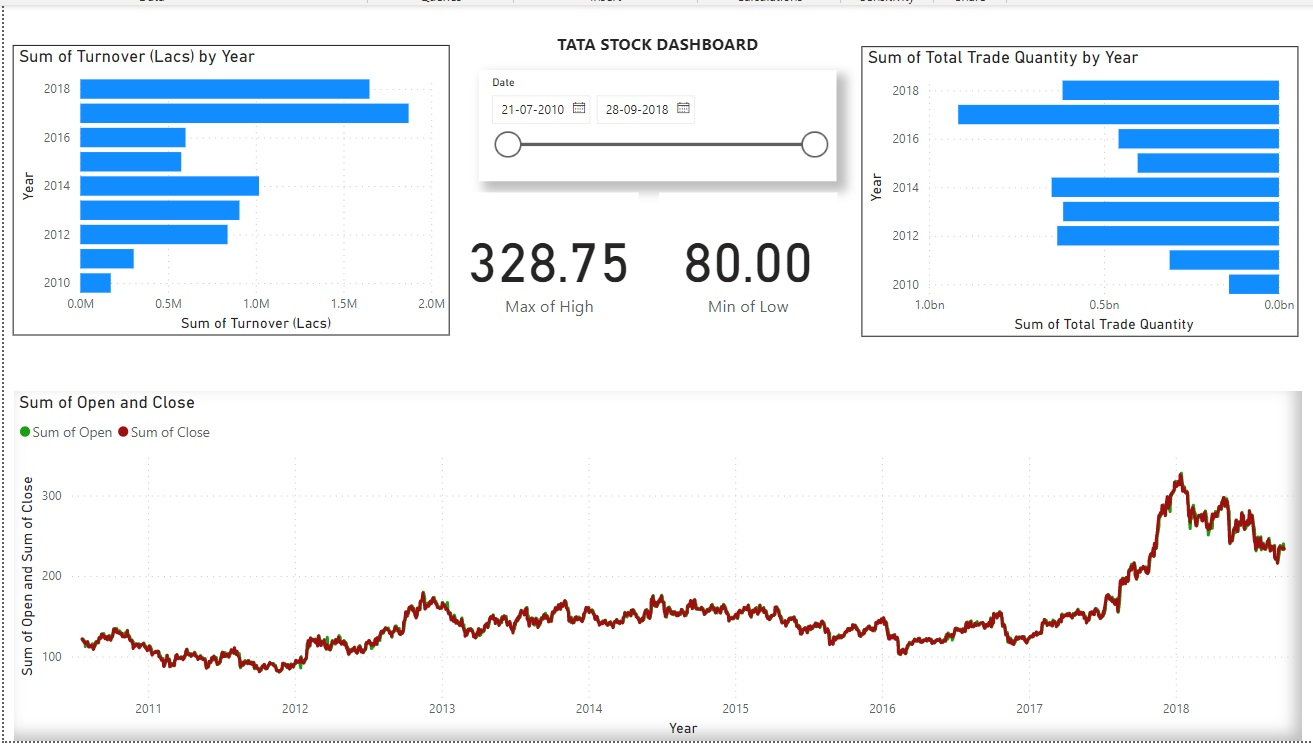

This is a dashboard for TATA Stocks created using PowerBI.

Github Repository of code and dashboard: https://github.com/Stel29/TCS-Internship-2022

### Conclusion

In [74]:
print("The accuracy for Multi-Linear Regression is: {}".format(mlr.score(X_test, y_test)))
print("The accuracy for Decision Tree is: {}".format(reg.score(X_test,y_test)))
print("The accuracy for Random Forest Regressor is: {}".format(rf_tree.score(X_test_std,y_test)))

The accuracy for Multi-Linear Regression is: 0.9999321221990332
The accuracy for Decision Tree is: 0.9994157451258643
The accuracy for Random Forest Regressor is: 0.9997139611064216


The accuracy of multi-linear regression is 99.99% followed by Random Forest and Decision Tree as 99.97% and 99.92% respectively